# LWE with Side Information. Attacks and Concrete Security Estimation

*Warning: in constrast with the paper "LWE with Side Information, Attacks and Concrete Security Estimation", here is used the french matrix convention: every matrix and vector is up to a transposition.* 

One has an instance of a LWE problem: one has
 * $A \in \mathbb{Z}_q^{m \times n}$ and 
 * $b= Az + e \in \mathcal{Z}_q^m$

where $z \leftarrow \chi^n$ and $e \leftarrow \chi^m$ are sampled with independant and identically distributed coefficients following the small distribution $\chi$.

Objective of the problem: *Find $z$.*

*Notation, we will note $s$ for $(e, z)$. It represents all the secret elements. Even if one is not interested directly by $e$, it is equally important as $s$. And one will not $\bar{s}$ for $(e, z, 1)$.*

## Quick reminder about the original primal attack

To recover the secret $z$, here is the method of the primal attack :
 1. First, transform the LWE instance into a uSVP instance thanks to the lattice $\Lambda = \{(x, y, w) \in \mathbb{Z}^{m + n + 1} : x + Ay - b w = 0 \text{ mod } q\}$.
 2. Then, reduce the lattice to find a *short vector* in this lattice. If the attack is successful, it will be $\bar{s} = (e,z,1)$.
 
![](img/original-primal-attack.png)

## Methodology to integrate some hints

### Distorted Bounded Distance Decoding (Distorted BDD)

The Distorted BDD is a generalisation of the traditionnal BDD. Let $\Lambda \subset \mathbb{R}^d$ be a lattice, $\Sigma \in \mathbb{R}^{d \times d}$ be a symmetric matrix and $\mu \in \text{Span}(\Lambda) \subset \mathbb{R}^d$ such that
$$\text{Span}(\Sigma) \subsetneq \text{Span}( \Sigma + \mu^T \cdot \mu) = \text{Span}(\Lambda)$$
The Distorted Bounded Distance Decoding problem $DBDD_{\Lambda, \mu, \Sigma}$ is the following problem:
 * Given $\mu$, $\Sigma$ and a basis of $\Lambda$.
 * Find the unique vector $x \in \Lambda \cap E(\mu, \Sigma)$
where $E(\mu, \Sigma)$ denotes the ellipsoid
$$E(\mu, \Sigma) := \{x \in \mu + \text{Span}(\Sigma) | (x-\mu)^T \Sigma^{-1} (x-\mu) \leq \text{rank}(\Sigma) \}$$
One will refer to the triple $\mathcal{I} = (\Lambda, \mu, \Sigma)$ as the instance of the $DBDD_{\Lambda, \mu, \Sigma}$ problem.

Why "Distorted" ? Because $$E(\mu, \sigma) = \sqrt{\Sigma} \cdot B_{\text{rank}(\Sigma)} + \mu$$
where $B_{\text{rank}(\Sigma)}$ is the centered hyperball of radius $\text{rank}(\Sigma)$.

Some remarks to understand Distorted BDD: 
 * *Warning !* $\Sigma$ has no inverse. So one uses a generalisation of the notion of inversion. One will denote $\Sigma^{-1}$ for the matrix satifying $$\Sigma \cdot \Sigma^{-1} = \Pi_\Sigma$$. Such a matrix can be compute thanks to the relation $$\Sigma^{-1} := (\Sigma + \Pi_\Sigma^\bot)^{-1} - \Pi_\Sigma^\bot$$
 * It is possible to interpret Distorted BDD as the promise that the secret follows a Gaussian distribution of center $\mu$ and covariance $\Sigma$. In fact, one will use the point of view to manipulate Distorted BDD instances during hint integration.
 * How is defined the perimeter of the ellipsoid ? $(x-\mu)^T \Sigma^{-1} (x-\mu)$ can be seen as a non-canonical Euclidian squared distance $\|x-\mu\|_\Sigma^2$. And then, if one uses the point of view of Gaussian distribution of center $\mu$ and covariance $\Sigma$ for Distorted BDD, what is the average of $(x-\mu)^T \Sigma^{-1} (x-\mu)$ ?
 $$\begin{align*}
     \mathbb{E}[\|x-\mu\|_\Sigma^2] & = \mathbb{E} \left [\sum_{j=1}^d \sum_{k=1}^d (x-\mu)_j (\Sigma_{j,k}^{-1}) (x-\mu)_k \right ] \\
         & = \sum_{j=1}^d \sum_{k=1}^d \Sigma_{j,k}^{-1} \cdot \mathbb{E} [ (x-\mu)_j (x-\mu)_k ] \\
         & = \sum_{j=1}^d \sum_{k=1}^d \Sigma_{j,k}^{-1} \cdot \text{Cov} ((x-\mu)_j, (x-\mu)_k)) \hspace{10mm} \text{because} \mathbb{E} [x-\mu] = 0 \\
         & = \sum_{j=1}^d \sum_{k=1}^d \Sigma_{j,k}^{-1} \Sigma_{k,j} 
          = \sum_{j=1}^d (\Sigma^{-1} \Sigma)_{j,j} = \sum_{j=1}^d (\Pi_\Sigma)_{j,j} \\
         & = \text{Tr}(\Pi_\Sigma) = \text{rank}(\Pi_\Sigma) = \text{rank}(\Sigma)
 \end{align*}$$
 * The condition $\Sigma \in \mathbb{R}^{d \times d}$ is just a technical condition. One needs it somewhere in the improved attack. 

### Global methodology

To recover the secret $z$ *with some hints*, here is the method of the improved primal attack :
 1. First, transform the LWE instance into a Distorted BDD instance using the lattice of the original primal attack.
 2. Then, integrate the hints *by transforming the Distorted BDD instance*.
   * Each type of hints needs a specific tranformation.
   * The studied types are ($v$, $l$ and $\sigma$ are known):
     * Perfect hints : $\langle s, v \rangle = l$
     * Modular hints : $\langle s, v \rangle = l\text{ mod }k$
     * Approximating hints : $\langle s, v \rangle = l + \varepsilon_\sigma$
     * ...
 3. Transform the Distorted BDD instance into a uSVP instance.
 4. Then, reduce the lattice to find a *short vector* in this lattice.
 
![](img/improved-primal-attack.png)

Some important remarks:
 * When one integrates a hint, the lattice is only **restricted**. So, if one find the solution to the last Distorted BDD, it will **directly** be the solution of the first Distorted BDD (no need to transform the solution). And it will be **directly** give the solution of the LWE, because it will be in the form of $\bar{s}=(e, z, 1)$.
 * To complete the previous remark, when one gets the short vector from the *lattice reduction*, the only transformation to get the solution of the LWE problem is the inversed transformation of the step 3 "Distorted BDD $\mapsto$ uSVP.

#### [Section 3.2] Transform the LWE instance into a Distorted BDD instance using the lattice of the original primal attack

Denoting $\mu_\chi$ and $\sigma_\chi^2$ the average and variance of the LWE distribution $\chi$, we can convert this LWE instance to a $DBDD_{\Lambda, \mu, \Sigma}$ instance with:
 * $\Lambda = \{(x, y, w) \in \mathbb{Z}^{m + n + 1} : x + Ay - b w = 0 \text{ mod } q\}$
 * $\mu = (\mu_\chi \cdot\cdot\cdot \mu_\chi 1)$
 * $\Sigma = \left ( \begin{array}{cc} \sigma_\chi^2 I_{m+n} & 0 \\ 0 & 0 \end{array} \right ) $
 
The lattice $\Lambda$ is of full rank in $\mathbb{R}^d$ where $d := m+n+1$ and its volume is $q^m$. A basis is given by the column vectors of
$$\left ( \begin{array}{ccc}
q I_m & A & b \\
0 & -I_n & 0 \\
0 & 0 & 1 \\
\end{array}
\right ) $$

**If $s=(e,z)$ is the solution of the LWE instance, when $\bar{s}$ is the solution of this $DBDD_{\Lambda, \mu, \Sigma}$ instance ?**
$$(\bar{s}-\mu)^T \Sigma^{-1} (\bar{s}-\mu) = \left (e ~~ z ~~ 0 \right ) \left ( \begin{array}{cc} \frac{1}{\sigma_\chi^2} I_{m+n} & 0 \\ 0 & 0 \end{array} \right ) \left ( \begin{array}{c} e \\ z \\ 0 \end{array} \right ) = \left (e ~~ z ~~ 0 \right ) \left ( \begin{array}{c} \frac{1}{\sigma_\chi^2} e \\ \frac{1}{\sigma_\chi^2} z \\ 0 \end{array} \right ) = \frac{1}{\sigma_\chi^2} \left ( \|e\|^2 + \|z\|^2 \right ) = \frac{1}{\sigma_\chi^2}\|s\|^2 $$

So, $\bar{s}$ is the solution if this $DBDD_{\Lambda, \mu, \Sigma}$ instance if, and only iff,
$$\frac{1}{\sigma_\chi^2}\|s\|^2 \leq \text{rank}(\Sigma) = d-1$$
So, $$\frac{1}{d-1} \sum_{i=1}^{d-1} s_i^2 \leq \sigma_\chi^2 $$

And it is the case up to a constant probability.

In [19]:
import numpy as np
drange = range(1, 2*640+1+1, 10)
probas = np.zeros((len(drange), 3))
for i, d in enumerate(drange):
    nb_experiments = 100000
    secret = np.random.normal(0, 1, size=(nb_experiments, d))
    data = np.var(secret, axis=1) > 1
    m, t = np.average(data), 1.960*np.sqrt(np.var(data)*nb_experiments/(nb_experiments-1))/np.sqrt(nb_experiments)
    probas[i] = [m, m-t, m+t]

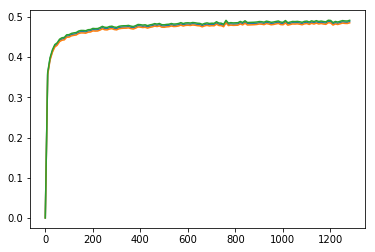

In [20]:
import matplotlib.pyplot as plt
plt.plot(drange, probas[:,0])
plt.plot(drange, probas[:,1])
plt.plot(drange, probas[:,2])
plt.show()
None

#### [Section 3.3] Transform the Distorted BDD instance into a uSVP instance.

One has a Distorted BDD instance $DBDD_{\Lambda, \mu, \Sigma}$, and one wants to transform it to a uSVP instance. How to proceed ?

What is a uSVP instance ? It is a **BDD instance**, where the given vector is **zero**. So, one must:
 * **homogenize** *ie* transform our $DBDD_{\Lambda, \mu, \Sigma}$ instance into a **centered** $DBDD_{\Lambda', 0, \Sigma'}$ instance.
 * **isotropize** the instance. After centering, one always has a **distorted** instance. It means that the notion of distance is not the same depending of the direction. So, one must undistort the instance into a $DBDD_{\Lambda'', 0, \Pi_\Lambda}$. And then, it is a uSVP instance.

**Homogenize**. One can just remark (not trivial) that $E(\mu, \Sigma)$ is contained in a larger centered ellipsoid.
$$E(\mu, \Sigma) \subset E(0, \Sigma + \mu \mu^T)$$
So, the transformation is
$$(\Lambda, \mu, \Sigma) \mapsto (\Lambda, 0, \Sigma' := \Sigma + \mu\mu^T)$$

**Isotropize.** To get an isotropic distribution (*ie* with all its eigenvalues being 1), one can just multiply every element of the lattice with the pseudoinverse of $\sqrt{\Sigma'}$. Indeed, one gets a new covariance matrix $\Sigma'' = (\sqrt{\Sigma'}^{-1})^T \Sigma' \sqrt{\Sigma'}^{-1} = \Pi_{\Sigma'}^T \Pi_{\Sigma'}$. And since $\Pi_{\Sigma'} = \Pi_{\Sigma'}^T$ and $\Pi_{\Sigma'}^2 = \Pi_{\Sigma'}$, $\Sigma''=\Pi_{\Sigma'} = \Pi_\Lambda$.

So, the transformation is
$$(\Lambda, 0, \Sigma') \mapsto (M \cdot \Lambda, 0, \Pi_\Lambda)~~~\text{ with }~~~ M:=(\sqrt{\Sigma'})^{-1}$$


After lattice reduction, from the solution $x$ to the $uSVP_{M \cdot \Lambda}$ problem, one can derive $x' = M^{-1} x$ the solution to the
$DBDD_{\Lambda,\mu,\Sigma}$ problem.

In [ ]:
### Extract of the implementation of the DBDD class
def attack(self, beta_max=None, beta_pre=None, randomize=False, tours=1):
    """
    Run the lattice reduction to solve the DBDD instance.
    Return the (blocksize, solution) of a succesful attack,
    or (None, None) on failure
    """
    # [...]
    
    # Apply adequate distortion
    d = B.nrows()
    S = self.S + self.mu.T * self.mu
    L, Linv = square_root_inverse_degen(S, self.B)
    M = B * Linv

    # Make the matrix Integral
    denom = lcm([x.denominator() for x in M.list()])
    M = matrix(ZZ, M * denom)

    # Build the BKZ object
    # [...]

    u_den = lcm([x.denominator() for x in self.u.list()])
    
    # Run BKZ tours with progressively increasing blocksizes
    for beta in range(beta_pre, B.nrows() + 1):
        # Apply BKZ
        # [...]
        
        # Recover the tentative solution,
        # undo distorition, scaling, and test it
        v = vec(bkz.A[0])
        v = u_den * v * L / denom
        solution = matrix(ZZ, v.apply_map(round)) / u_den

        if not self.check_solution(solution):
            continue

        # Success !
        return beta, solution 

    # Failure...
    return None, None

#### [Section 3.4] Security estimates of uSVP

The cost of the primal attack is the minimal of $\text{cost}_{BKZ}(\beta, d)$ with $\beta$ verifing the successful condition !

$$\text{cost}_{attack}(d) = \min_{\beta \text{ s.t } \sigma \sqrt{\beta} \leq \delta_0(\beta)^{2 \beta - \text{dim}(\Lambda) - 1} \text{Vol}(\Lambda)^{1/\text{dim}(\Lambda)}} \text{cost}_{BKZ}(\beta)$$

In our case, what is $\sigma$ ? Thanks to the isotropizing step, the secret has covariance $\Sigma = I$ (or $\Sigma = \Pi_\Lambda$ if $\Lambda$ is not of full rank), so here $\sigma=1$.

In this cost, one can remark that $\beta$ can give a scale of the security of the problem. Instead using bit-size scale, it is possible to use $\beta$. This point of view has the advantage of abstracting from the BKZ cost model. It is the choice made in the paper. **This choice is possible thanks to the particular structure of the attack.** For example, it is not possible to make the same choice for an analysis of the dual attack. 

Assuming the Gaussian Heuristic (GH) and Geometric Series Assumption (GSA), a limiting value of root-Hermite factor $\delta_0$ achievable by BKZ with block size $\beta$ is $$\delta_0(\beta) \approx \left ( \frac{\beta}{2 \pi e} (\pi \beta)^{\frac{1}{\beta}} \right ) ^ {\frac{1}{2(\beta-1)}}$$

*Warning*, the Gaussian Heuristic is a good experimental approximation only if $\beta$ is sufficiently big ($\beta > 40$).

In [ ]:
### Extract of the implementation of utils.sage
def bkzgsa_gso_len(logvol, i, d, beta=None, delta=None):
    if delta is None:
        delta = compute_delta(beta)
    return RR(delta**(d - 1 - 2 * i) * exp(logvol / d))

def compute_beta_delta(d, logvol, tours=1, interpolate=True, probabilistic=False):
    """
    Computes the beta value for given dimension and volumes
    It is assumed that the instance has been normalized and sphericized, 
    i.e. that the covariance matrices of the secret is the identity
    :d: integer
    :vol: float
    """
    bbeta = None
    pprev_margin = None

    # Keep increasing beta to be sure to catch the second intersection
    if not probabilistic:
        for beta in range(2, d):
            lhs = RR(sqrt(beta))
            rhs = bkzgsa_gso_len(logvol, d - beta, d, beta=beta)

            if lhs < rhs and bbeta is None:
                margin = rhs / lhs
                prev_margin = pprev_margin
                bbeta = beta

            if lhs > rhs:
                bbeta = None
            pprev_margin = rhs / lhs

        if bbeta is None:
            return 9999, 0

        ddelta = compute_delta(bbeta) * margin**(1. / d)
        if prev_margin is not None and interpolate:
            beta_low = log(margin) / (log(margin) - log(prev_margin))
        else:
            beta_low = 0
        assert beta_low >= 0
        assert beta_low <= 1
        return bbeta - beta_low, ddelta

    else:
        # [...]
        return average_beta, ddelta

### Extract of the implementation of the DBDD_generic class
def estimate_attack(self, probabilistic=False, tours=1, silent=False):
    """ Assesses the complexity of the lattice attack on the instance.
    Return value in Bikz
    """
    (Bvol, Svol, dvol) = self.volumes()
    dim_ = self.dim()
    beta, delta = compute_beta_delta(
        dim_, dvol, probabilistic=probabilistic, tours=tours)

    # [...]
    return (beta, delta)

### [Section 4.1] Perfect Hints

**Perfect hint**. A perfect hint on the secret $s$ is the knowledge of $v \in \mathbb{Z}^{d-1}$ and $l \in \mathbb{Z}$, such that
$$\langle s, v \rangle = l$$

#### Integrating a perfect hint into a Distorted BDD instance $\mathcal{I} = (\Lambda, \mu, \Sigma)$.

Let $v \in \mathbb{Z}^d$ and $l \in \mathbb{Z}$ be such that
$\langle s, v \rangle = l$. Note that the hint can also be written as
$$\langle \bar{s}, \bar{v} \rangle = 0$$

where $\bar{s}=(e, z, 1)$ is the solution of the instance $\mathcal{I}$ (when $s=(e,z)$) and $\bar{v} := (v, -l)$.

With this hint, the lattice $\Lambda$ of the instance $\mathcal{I}$ is reduced. Indeed, one keeps only the elements $x$ of the lattice $\Lambda$ which verify the property $\langle x, \bar{v} \rangle = 0$.

$$\Lambda' = \Lambda \cap \{ x \in \mathbb{Z}^d~|~\langle x, \bar{v} \rangle = 0 \}$$

One will interpret Distorted BDD as the promise that the secret $\bar{s}$ follows a Gaussian distribution of center $\mu$ and covariance $\Sigma$, *ie* $\bar{s} \sim \mathcal{D}^{d}_{\Sigma, \mu}$.

Then, one wants to know the distribution of
$$\bar{s}~|~\langle \bar{s}, \bar{v} \rangle = 0$$

Using *"Linear transformation of multivariate normal distribution: Marginal, joint and posterior"* of L.-P. Liu, one directly has $\bar{s}~|~(\langle \bar{s}, \bar{v} \rangle = 0) \sim \mathcal{D}^{d}_{\Sigma', \mu'}$ with

$$\begin{align*}
  \mu' & = \mu - \frac{\langle \bar{v}, \mu \rangle}{\bar{v}^T \Sigma \bar{v}}\Sigma \bar{v} \\
  \Sigma' & = \Sigma - \frac{\Sigma \bar{v} (\Sigma \bar{v})^T}{\bar{v}^T \Sigma \bar{v}}\\
\end{align*}$$

In [ ]:
### Extract of the implementation of the DBDD class
def integrate_perfect_hint(self, v, l):
    V = concatenate(v, -l)
    VS = V * self.S
    den = scal(VS * V.T)

    if den == 0:
        raise RejectedHint("Redundant hint")

    self.D = lattice_orthogonal_section(self.D, V)

    num = self.mu * V.T
    self.mu -= (num / den) * VS
    num = VS.T * VS
    self.S -= num / den

To **compute a basis of $\Lambda'$**, here is an algorithm working on the dual lattice.
1. Let $D$ be dual basis of $B$. Compute $D_\bot := \Pi_\bar{v}^\bot \cdot D$
2. Apply LLL algorithm on $D_\bot$ to eliminate linear dependencies. Then delete the first row of $D'$ (which is $0$ because with the hyperplane intersection, the dimension of the lattice is decremented).
3. Output the dual of the resulting matrix.

In [22]:
### Extract of the implementation of geometry.sage
def lattice_modular_intersection(D, V, k):
    V = project_and_eliminate_dep(D, V)
    r = V.nrows()

    # Project the dual basis orthogonally to v
    PV = projection_matrix(V)
    D = D - D * PV

    # Eliminate linear dependencies
    D = D.LLL()
    D = D[r:]

    # Go back to the primal
    return D

Let show its **correction**. According to *"Perfect lattices in Euclidean spaces"* of J. Martinet, for $F$ a subspace of $\mathbb{R}^d$, one has
$$(\Lambda \cap F)^* = \Pi_F \cdot \Lambda$$
Here, the subspace $F$ is $\bar{v}^\bot$, so
$$(\Lambda \cap \bar{v}^\bot)^* = \Pi_\bar{v}^\bot \cdot \Lambda$$


Let denote $\Lambda_o$ the output of the algorithm. One has, by step 1, $$\Lambda_o = (\Pi_\bar{v}^\bot \cdot \Lambda)^* = \left ( (\Lambda \cap \bar{v}^\bot)^* \right ) ^* = \Lambda \cap \bar{v}^\bot = \Lambda'$$

What about the **dimension** and the **volume** of the new lattice ?

$$\begin{align*}
    \text{dim}(\Lambda') & = \text{dim}(\Lambda) - 1 \\
    \text{Vol}(\Lambda') & = \|\bar{v}\| \cdot \text{Vol}(\Lambda) \\
\end{align*}$$

The last egality is **verified** when $\frac{\bar{v}}{i} \not \in \Lambda^*$ for any $i \geq 2$ (when $\bar{v}$ is "primitive with respect to $\Lambda^*$"). This is an assumption **empirically verified** when $v$ has some small coefficients. 

<!--
$$\langle \bar{s}, \frac{\bar{v}}{i} \rangle = \langle s, v \rangle + \left ( \frac{-l}{i} \right ) = l - \frac{l}{i} = l \cdot \left ( 1 - \frac{1}{i} \right ) = l \cdot \left ( \frac{i-1}{i} \right )$$
If there **exists** a $i \geq 2$ such that $\langle \bar{s}, \frac{\bar{v}}{i} \rangle \in \mathbb{Z}$, then $i~|~l$. And then, $\frac{\bar{v}}{i}$ and $\bar{v}$ leak the **same information**, so one can applied the property for $\frac{v}{i}$. 
 -->

**When can one obtain a hint like it ?**
 * Full leak without noise of a original coefficient
 * Noisy leakage, but with a rather high guessing confidence
 * Hint 'by design"

### [Section 4.2] Modular Hints

**Modular hint**. A modular hint on the secret $s$ is the knowledge of $v \in \mathbb{Z}^{d-1}$, $k \in \mathbb{Z}$ and $l \in \mathbb{Z}$, such that
$$\langle s, v \rangle = l \text{ mod } k$$

#### Integrating a modular hint into a Distorted BDD instance $\mathcal{I} = (\Lambda, \mu, \Sigma)$.

Let $v \in \mathbb{Z}^{d-1}$, $k \in \mathbb{Z}$ and $l \in \mathbb{Z}$ be such that
$\langle s, v \rangle = l \text{ mod } k$. Note that the hint can also be written as
$$\langle \bar{s}, \bar{v} \rangle = 0 \text{ mod } k$$

where $\bar{s}=(e, z, 1)$ is the solution of the instance $\mathcal{I}$ (when $s=(e,z)$) and $\bar{v} := (v, -l)$.

Intuitively, such a hint should only **sparsify** the lattice, and leave the average and the variance
**unchanged**. This is not entirely true, this is only (approximately) true when the variance is
sufficiently large in the direction of $\bar{v}$ to ensure smoothness, *ie* when $k^2 << \bar{v}^T \Sigma \bar{v}$.

So, in this **smooth case**, we therefore have
$$\begin{align*}
  \Lambda' & = \Lambda \cap \{ x \in \mathbb{Z}^d~|~\langle x, \bar{v} \rangle = 0 \text{ mod } k \} \\
  \mu' & = \mu \\
  \Sigma' & = \Sigma \\
\end{align*}$$

To compute a basis of $\Lambda'$, here is an algorithm working on the dual lattice.
1. Let $D$ be dual basis of $B$.
2. Redefine $\bar{v} \leftarrow \Pi_\Lambda \cdot \bar{v}$, noting that this does not affect the validity of the hint.
3. Append $\frac{\bar{v}}{k}$ to $D$ and obtain $D'$
4. Apply LLL algorithm on $D'$ to eliminate linear dependencies. Then delete the first row of $D'$ (which is $0$ since we introduced a linear dependency).
5. Output the dual of the resulting matrix.

In [3]:
### Extract of the implementation of geometry.sage
def lattice_modular_intersection(D, V, k):
    # Project v on Span(B)
    V = project_and_eliminate_dep(D, V)
    r = V.nrows()

    # append the equation in the dual
    V /= k
    # D = dual_basis(B)
    D = D.stack(V)

    # Eliminate linear dependencies
    D = D.LLL()
    D = D[r:]

    # Go back to the primal
    return D

Let show its **correction**. Let denote $\Lambda_o$ its output. One has, by step 3, $$\text{Span}(D') = \text{Span}(D) + \text{Span}(\frac{\bar{v}}{k})$$
So, $$\Lambda_o^* = \Lambda^* + \frac{\bar{v}}{k}\mathbb{Z}$$
And so, $$\begin{align*}
\Lambda_o & = \left ( \Lambda^* + \frac{\bar{v}}{k}\mathbb{Z} \right ) ^* = \left ( \Lambda^* \right ) ^* \cap \left ( \frac{\bar{v}}{k}\mathbb{Z} \right )^* \\
& = \Lambda \cap \{ x \in \mathbb{Z}^d~|~\forall l\in\mathbb{Z}, \langle x, \frac{\bar{v}}{k} l \rangle \in \mathbb{Z} \} \\
& = \Lambda \cap \{ x \in \mathbb{Z}^d~|~\langle x, \frac{\bar{v}}{k} \rangle \in \mathbb{Z} \} \\
& = \Lambda \cap \{ x \in \mathbb{Z}^d~|~\langle x, \bar{v} \rangle = 0 \text{ mod } k \} = \Lambda' \\
\end{align*}$$

What about the **dimension** and the **volume** of the new lattice ?

$$\begin{align*}
    \text{dim}(\Lambda') & = \text{dim}(\Lambda) \\
    \text{Vol}(\Lambda') & = k \cdot \text{Vol}(\Lambda) \\
\end{align*}$$

The last egality is **verified** under a primitivity condition, which is **empirically verified** when $v$ has some small coefficients. 

**And, what about the case where it is not smooth ?**

 * If $k^2 >> v^T \Sigma v$, one can approximate this hint by a **perfect hint** with $\langle s, v \rangle = l + ki$ for some $i$.
 * If $k^2 \approx v^T \Sigma v$, one can still apply the formulae of the arbitrary hints. One can numerically compute the average $\mu_c$ and the variance $\sigma_c^2$ of $\langle \bar{s}, \bar{v} \rangle$, *ie* compute the average $\mu_c$ and the variance $\sigma_c^2$ of the one-dimensional discrete Gaussian distribution of average $\langle \mu, \bar{v} \rangle$ and variance $\sigma^2 = v^T \Sigma v$ modulus $k$.

**When can one obtain a hint like it ?**
 * Leakage of the form $a=|s|$, because it implies $s=a \text{ mod } 2a$ (obtained by a timing attack).
 * Leakage Modulus $q$

### [Section 4.3] Approximate Hints (conditioning)

**Approximate hint**. A approximate hint on the secret $s$ is the knowledge of $v \in \mathbb{Z}^{d-1}$ and $l \in \mathbb{Z}$, such that
$$\langle s, v \rangle + e = l$$
where $e$ models noise following a distribution $\mathcal{D}_{\sigma_e^2, 0}^1$, independent of $s$.

#### Integrating an approximate hint into a Distorted BDD instance $\mathcal{I} = (\Lambda, \mu, \Sigma)$.

Let $v \in \mathbb{Z}^d$ and $l \in \mathbb{Z}$ be such that
$\langle s, v \rangle \approx l$. Note that the hint can also be written as
$$\langle \bar{s}, \bar{v} \rangle + e = 0$$

where $\bar{s}=(e, z, 1)$ is the solution of the instance $\mathcal{I}$ (when $s=(e,z)$), $\bar{v} := (v, -l)$ and $e$ follows $\mathcal{D}_{\sigma_e^2, 0}^1$ distribution.

With this hint, the lattice $\Lambda$ of the instance $\mathcal{I}$ doesn't change, because the hint is approximate and so no possibility is strictly rejected !

$$\Lambda' = \Lambda$$

As before, one will interpret Distorted BDD as the promise that the secret $s$ follows a Gaussian distribution of center $\mu$ and covariance $\Sigma$, *ie* $\bar{s} \sim \mathcal{D}^{d}_{\Sigma, \mu}$.

Then, one wants to know the distribution of
$$\bar{s}~|~\langle \bar{s}, \bar{v} \rangle + e = 0$$

Using *"Linear transformation of multivariate normal distribution: Marginal, joint and posterior"* of L.-P. Liu, one directly has $\bar{s}~|~(\langle \bar{s}, \bar{v} \rangle + e = 0) \sim \mathcal{D}^{d}_{\Sigma', \mu'}$ with

$$\begin{align*}
  \mu' & = \mu - \frac{\langle \bar{v}, \mu \rangle}{\bar{v}^T \Sigma \bar{v} + \sigma_e^2}\Sigma \bar{v} \\
  \Sigma' & = \Sigma - \frac{\Sigma \bar{v} (\Sigma \bar{v})^T}{\bar{v}^T \Sigma \bar{v} + \sigma_e^2}\\
\end{align*}$$

Remark:
 * If $\sigma_e = 0$, one falls back to a perfect hint $\langle s, v \rangle = l$.

**When can one obtain a hint like it ?**
 * Any noisy side channel information about a secret coefficient.
 * Decryption failures.

### [Section 4.4] Approximate Hints (*a posteriori*)

**Approximate hint (*a posteriori*)**. An approximate hint (*a posteriori*) on the secret $s$ is the knowledge of the distribution of $\langle s, v \rangle$.

#### Integrating an approximate hint (*a posteriori*) into a Distorted BDD instance $\mathcal{I} = (\Lambda, \mu, \Sigma)$.

Let $\mathcal{P}$ the distribution of $\langle s, v \rangle$. With $\mathcal{P}$, the hint can also be written as the distribution $\mathcal{P}_i$ of $\langle \bar{s}, \bar{v} \rangle$ where $\bar{s}=(e, z, 1)$ is the solution of the instance $\mathcal{I}$ (when $s=(e,z)$) and $\bar{v} := (v, -i)$, for some $i$.

Let denote $\mu_i$ the average of $\mathcal{P}_i$ and $\sigma_i^2$ its variance.

This hint gives the known distribution on the direction of $\frac{\bar{v}}{\|\bar{v}\|}$.

$$\begin{align*}
    \mu' &= \hat{\Pi}_{\bar{v}}^\bot \mu + \mu_{ap} \cdot \frac{\Sigma \bar{v}}{\bar{v}^T \Sigma \bar{v}} \\
    \Sigma' &= \hat{\Pi}_{\bar{v}}^\bot \cdot \Sigma \cdot (\hat{\Pi}_{\bar{v}}^\bot)^T + \sigma_{ap}^2 \cdot \frac{(\Sigma \bar{v}) (\Sigma \bar{v})^T}{(\bar{v}^T \Sigma \bar{v})^2}
\end{align*}$$

where $$\hat{\Pi}_{\bar{v}} := \frac{\Sigma \bar{v} \bar{v}^T}{\bar{v}^T \Sigma \bar{v}}$$

The idea of the pseudo-projection $\hat{\Pi}_{\bar{v}}^\bot$ is to **remove the contribution of $\bar{v}$ in the average $\mu$ and the covariance matrix $\Sigma$**, in order to add a new contribution after.

The lattice $\Lambda$ of the instance $\mathcal{I}$ generally doesn't change, because no possibility is strictly rejected !

$$\Lambda' = \Lambda$$

**Warning**. *This is an approximation. As said in a previous remark, the Distorted BDD can be seen as a multivariate Gaussian distribution of center $\mu$ and covariance $\Sigma$. Here, the distribution $\mathcal{P}_i$ may not be a Gaussian distribution, but one makes this approximation.*

Remark:
 * If $\mu_{ap}=0$ and $\sigma_{ap} = 0$, one falls back to a perfect hint $\langle s, v \rangle = i$.
 * **Non-smooth case in modular hints**. If $k^2 \approx v^T \Sigma v$, one can still apply the formulae of the approximate hints (*a posteriori*). One can numerically compute the average $\mu_{ap}$ and the variance $\sigma_{ap}^2$ of $\langle \bar{s}, \bar{v} \rangle$, *ie* compute the average $\mu_{ap}$ and the variance $\sigma_{ap}^2$ of the one-dimensional discrete Gaussian distribution of average $\langle \mu, \bar{v} \rangle$ and variance $\sigma^2 = v^T \Sigma v$ modulus $k$.

**When can one obtain a hint like it ?**
 * Hint from template attack (like the attack against Frodo)


### [Most general case] Noised *A Posteriori* Approximate Hints

**Noised *A Posteriori* Approximate hint**. Such a hint on the secret $s$ is the knowledge of the distribution of $$\langle s, v \rangle+e$$
where $e$ models noise following a distribution $\mathcal{D}_{\sigma_e^2, 0}^1$, independent of $s$.

#### Integrating such a hint into a Distorted BDD instance $\mathcal{I} = (\Lambda, \mu, \Sigma)$.

Let $\mathcal{P}$ the distribution of $\langle s, v \rangle$. With $\mathcal{P}$, the hint can also be written as the distribution $\mathcal{P}_i$ of $\langle \bar{s}, \bar{v} \rangle+e$ where $\bar{v} := (v, -i)$, for some $i$.

Let denote $\mu_i$ the average of $\mathcal{P}_i$ and $\sigma_i^2$ its variance. Let denote $\Sigma_e^2$ the variance of the independent noise distribution.

This hint gives the known distribution on the direction of $\frac{\bar{v}}{\|\bar{v}\|}$. One can transform $\mathcal{I}$ into $\mathcal{I}'=(\Lambda, \mu', \Sigma')$ with

$$\begin{align*}
    \mu' &= \hat{\Pi}_{\bar{v}}^\bot \mu + \mu_{ap} \cdot \frac{\Sigma \bar{v}}{\bar{v}^T \Sigma \bar{v} + \sigma_e^2} \\
    \Sigma' &= \hat{\Pi}_{\bar{v}}^\bot \cdot \Sigma \cdot (\hat{\Pi}_{\bar{v}}^\bot)^T + (\sigma_{ap}^2 + \sigma_e^2) \cdot \frac{(\Sigma \bar{v}) (\Sigma \bar{v})^T}{(\bar{v}^T \Sigma \bar{v}+\sigma_e^2)^2}
\end{align*}$$

where $$\hat{\Pi}_{\bar{v}} := \frac{\Sigma \bar{v} \bar{v}^T}{\bar{v}^T \Sigma \bar{v}}$$

The lattice $\Lambda$ of the instance $\mathcal{I}$ generally doesn't change, because no possibility is strictly rejected !

$$\Lambda' = \Lambda$$

This case gathers all the previous cases (except for the modular case, which is a special case):
 * If $\mu_{ap}=0$, $\sigma_{ap}^2=0$ and $\sigma_e^2=0$, one falls back to a perfect hint.
 * It $\mu_{ap}=0$, $\sigma_{ap}^2=0$, one falls back to an approximate hint (conditioning).
 * If $\sigma_e^2=0$, one falls back to an approximate hint (*a posteriori*).

### [Section 4.5] Short  vector hints

In the original primal attack, one **removes some equations in the problem to improve the result of the attack**. Indeed, if there are too many equations, the lattice becomes too complicated and it is difficult to find a short vector. But if there are not enough equations, the lattice will be too sparse.

Here, one didn't remove equations in the transformation of the LWE problem into a Distorted BDD. One cannot do it before integrating hints, because removing equations changes the elements of the lattice (it is a projection onto a hyperplane). One must do it **after integrating all the hints**.

How to remove a equation ? One chooses a vector $\bar{v}$, and one does **the projection of the lattice on $\bar{v}^\bot$, the hyperplane orthogonal to $\bar{v}$**.

How to choose this vector $\bar{v}$ ? Can we take a random vector of $\Lambda$ ? **The answer is "no"**. Indeed, the secret vector must remain the smallest vector of the lattice.

**Fact: If one chooses $\bar{v}$ as a short vector (*ie* $\|v\| \approx \|s\|$), then it will be almost orthorgonal to the other shorts vectors (including $\bar{s}$), and so, the norms of these vectors are not too affected.**

*Proof of the fact* :

Let denote $\bar{s}$ the smallest vector of the lattice, and $\bar{v}$ another vector ($\bar{v} \not \in \text{Span}(\bar{s})$). There exists $y \in \bar{s}^\bot$ such that $\bar{v} = \alpha \cdot \bar{s} + y$, with $\alpha = \frac{\langle \bar{s}, \bar{v} \rangle}{\langle \bar{s}, \bar{s}\rangle}$. Because $\bar{s}$ is the smallest vector of the lattice, for $x\in\mathcal{R}$, one has
$$\begin{align*}
\|s\|^2 & \leq \|s - \lfloor x \rceil \cdot v \|^2 \\
    & = \| ( 1 - \alpha \lfloor x \rceil ) \cdot s - \lfloor x \rceil \cdot y \|^2 \\
    & = ( 1 - \alpha \lfloor x \rceil )^2 \|s\|^2 + \lfloor x \rceil^2 \cdot \|y\|^2 \\
    & = \lfloor x \rceil^2 \cdot (\|y\|^2 + \alpha^2 \|s\|^2) - \lfloor x \rceil \cdot (2 \alpha \|s\|^2) + \|s\|^2 \\
    & = \lfloor x \rceil^2 \cdot \|v\|^2 - \lfloor x \rceil \cdot (2 \alpha \|s\|^2) + \|s\|^2
\end{align*}$$
So,
$$0 \leq \|v\|^2 \cdot \lfloor x \rceil^2 - (2 \alpha \|s\|^2) \cdot \lfloor x \rceil $$

Let choose $x:=\alpha \frac{\|s\|^2}{\|v\|^2} = \frac{\langle \bar{s}, \bar{v} \rangle}{\langle \bar{v}, \bar{v}\rangle}$, then
$$0 \leq \lfloor x \rceil^2 - 2 x \cdot \lfloor x \rceil$$

And so (after studying the cases where $x \geq 0$ and where $x \leq 0$, one has
$$|x| \leq \frac{1}{2}$$

The angle $\lambda$ betwen $s$ and $v$ verifies $$\cos(\lambda) = \frac{\left \| \frac{\langle s, v \rangle}{\langle v, v \rangle} \cdot v \right \|}{\|s\|} = \frac{\left \| x \cdot v \right \|}{\|s\|} = |x| \frac{\|v\|}{\|s\|}$$ 

So, $$\cos(\lambda) \leq \frac{\|v\|}{2\|s\|}$$

And then, if $s$ is projected into $\bar{v}^\bot$, one has
$$\|\Pi_{\bar{v}}^\bot \bar{s}\| = \|\bar{s}\| \cdot \sqrt{1-\cos^2(\lambda)} \geq \|\bar{s}\| \cdot \sqrt{1-\frac{\|v\|^2}{4 \|s\|^2}}$$

If $v$ is a short vector (*ie* $\|v\| \approx \|s\|$), $$\lambda_\text{min} = \frac{\pi}{3} \hspace{1cm} \text{ and } \hspace{1cm}  \|\Pi_{\bar{v}}^\bot \bar{s}\| \geq \frac{\sqrt{3}}{2} \|\bar{s}\| \approx 0.866 \cdot \|\bar{s}\| $$

#### Integrating a short vector $\bar{v}$ hint into a Distorted BDD instance $\mathcal{I} = (\Lambda, \mu, \Sigma)$.

One simply makes a projection of the lattice.

$$\begin{align*}
    \Lambda' & = \Pi_\bar{v}^\bot \cdot \Lambda \\
    \mu' & = \Pi_\bar{v}^\bot \cdot \mu \\
    \Sigma' & = \Pi_\bar{v}^\bot \cdot \Sigma \cdot (\Pi_\bar{v}^\bot)^T \\
\end{align*}$$

To compute a basis of $\Lambda$, one realises the projection of the basis of $\Lambda$ and one uses the LLL algorithm to remove linear dependencies.

$$\begin{align*}
    \dim(\Lambda') &= \dim(\Lambda) - 1 \\
    \text{Vol}(\Lambda') &= \frac{1}{v^T v} \text{Vol}(\Lambda)
\end{align*}$$

The second equality is up to a primitivity condition ($\bar{v}$ must be a primitive vector in respect to $\Lambda$), which be often verified because $\bar{v}$ is small.

**Some experiments**

In [10]:
load("../framework/instance_gen.sage")
# NIST1 FRODOKEM-640
n = 640
m = 640
q = 2**15
frodo_distribution = [9288, 8720, 7216, 5264, 3384,
                      1918, 958, 422, 164, 56, 17, 4, 1]
D_s = get_distribution_from_table(frodo_distribution, 2 ** 16)

In [13]:
sqrt((n+m)*variance(D_s))

263.31223544175333

In [15]:
q

32768

## Application to Frodo

In [1]:
load("../framework/instance_gen.sage")

#### NIST1 FRODOKEM-640

In [2]:
# NIST1 FRODOKEM-640
n = 640
m = 640
q = 2**15
frodo_distribution = [9288, 8720, 7216, 5264, 3384,
                      1918, 958, 422, 164, 56, 17, 4, 1]
D_s = get_distribution_from_table(frodo_distribution, 2 ** 16)
load("Frodo_Single_data/simulation_distribution_NIST1.sage")
load("Frodo_Single_data/aposteriori_distribution_NIST1.sage")

#### Original Security

In [12]:
A, b, dbdd = initialize_from_LWE_instance(DBDD_predict_diag,
                                           n,
                                           q, m, D_s, D_s, verbosity=0)
dbdd.integrate_q_vectors(q, indices=range(n, n + m))
(beta, _) = dbdd.estimate_attack()
logging("Attack without hints:  %3.2f bikz (%3.2f bits)" % (beta, 0.265*beta), style="HEADER")

 Attack without hints:  487.00 bikz (129.06 bits) 


#### Refined Side channel attack

$$L = \{-11, ..., 11\}$$

**First phase.** One first learns a posteriori distributions from the experimental data of [11] *"Assessing the feasibility of single trace power analysis of Frodo."* of J. W. Bos, S. Friedberger, M. Martinoli, E. Oswald, and M. Stam. The score table for a secret coefficient $s_i$ is denoted $S_i$.

![](img/frodo-score-table.png)

One can then derive the a posteriori probability distribution of the secret *knowing the value of the best guess*. Let $x,g \in L$ and $0 \leq i \leq n - 1$,

$$D^{apost}_{i,g}(x) := \mathbb{P}[s_i = x~|~ \text{bestguess}(S_i) = g]$$

and more precisely its center denoted $\mu^{apost}_{i,g}$ and its variance denoted $v^{apost}_{i,g}$.

Similarly as the authors of [11], one makes an independence assumption. One assumes that the obtained score only depends on the secret coefficient $x \in L$ and the obtained best guess $g \in L$. One then omits the index $i$ and denote for $x, g \in L$,

$$D^{apost}_{g}(x) := \mathbb{P}[s_0 = x~|~ \text{bestguess}(S_0) = g]$$ 

with $\mu^{apost}_g$ its center and $v^{apost}_g$ its variance.

![](img/frodo-aposteriori-distribution.png)

**Second phase.**

Let $0 \leq i \leq n-1$, $v_i$ be the $i$-th canonical
vector and $g_i$ be the best guess associated to the $i$-th secret coefficient. The approximate hint is

$$\langle s, v_i \rangle = \mu^{apost}_{g_i} + e$$

where $e$ models the noise following a distribution $N_1(0, v^{apost}_{g_i})$ where $\mu^{apost}_{g_i}$ and $v^{apost}_{g_i}$ have been computed in phase one.

In [25]:
def simu_measured(secret):
    """
    This fonction simulates the information gained by
    Bos et al attack. The simulation is based on a
    distribution obtained with a large amount of data
    for Bos et al suite (in Matlab).
    :secret: an integer being the secret value
    :measurement: an integer that represents the output
    of Bos et al attack.
    """
    secret = recenter(secret)
    distrib_of_guesses = renormalize_dist(Dguess[secret])
    measurement = draw_from_distribution(distrib_of_guesses)
    return measurement

In [26]:
A, b, dbdd = initialize_from_LWE_instance(DBDD_predict_diag,
                                          n,
                                          q, m, D_s, D_s, verbosity=2)
measured = [simu_measured(dbdd.u[0, i]) for i in range(n)]
report_every = 50

      Build DBDD from LWE      
 n=640 	 m=640 	 q=32768 


In [27]:
# Integrate the leaked informations
Id = identity_matrix(n + m)
for i in range(n):
    v = vec(Id[i])
    
    # Log information for user
    if report_every is not None and ((i % report_every == 0) or (i == n - 1)) :
        verbose = 2 
    else:
        verbose = 0
    dbdd.verbosity = verbose
    if verbose == 2:
        logging("[...%d]" % report_every, newline=False)
    
    # Integrate the hint as a perfect or an approximate hints
    if variance_aposteriori[measured[i]] is not None and variance_aposteriori[measured[i]] != 0:
        dbdd.integrate_approx_hint(v,
                                   center_aposteriori[measured[i]],
                                   variance_aposteriori[measured[i]],
                                   aposteriori=True, estimate=verbose)
    elif variance_aposteriori[measured[i]] is not None and variance_aposteriori[measured[i]] == 0 :
        dbdd.integrate_perfect_hint(v, center_aposteriori[measured[i]],
                                    estimate=verbose)

        
# Integrate the known short verctors
if report_every is not None:
    dbdd.integrate_q_vectors(q, indices=range(n, n + m), report_every=report_every)
else:
    dbdd.integrate_q_vectors(q, indices=range(n, n + m))

# Estimate the attack
(beta, _) = dbdd.estimate_attack()

 [...50]   integrate approx hint   (aposteriori)   u0 = 5.36982968369830 + χ(σ²=0.311)   	 Worthy hint !   dim=1281, δ=1.00346938, β=486.83 
 [...50]   integrate approx hint   (aposteriori)   u50 = 1.755049101352603 + χ(σ²=0.765)   	 Worthy hint !   dim=1272, δ=1.00354349, β=472.57 
 [...50]   integrate perfect hint   u100 = 0.000000000000000   	 Worthy hint !   dim=1267, δ=1.00360062, β=462.07 
 [...50]   integrate approx hint   (aposteriori)   u150 = 3.069447793585725 + χ(σ²=0.444)   	 Worthy hint !   dim=1261, δ=1.00366333, β=450.78 
 [...50]   integrate approx hint   (aposteriori)   u200 = -1.515323025952966 + χ(σ²=1.992)   	 Worthy hint !   dim=1253, δ=1.00373639, β=438.35 
 [...50]   integrate approx hint   (aposteriori)   u250 = -1.515323025952966 + χ(σ²=1.992)   	 Worthy hint !   dim=1247, δ=1.00380231, β=427.52 
 [...50]   integrate approx hint   (aposteriori)   u300 = -1.515323025952966 + χ(σ²=1.992)   	 Worthy hint !   dim=1242, δ=1.00386479, β=417.64 
 [...50]   integrate p

#### Refined Side channel attack (with guesses)

In [28]:
def ordered_indices(sorted_guesses, measured):
        """
        Necessary for the bruteforce attack, this function
        sorts the indices of the coefficients
        of the secret with decreasing likelihood.
        :sorted_guess: the best guesses in order of likelihood
        :measured: the measurement for each coefficient
        :orderered_coefficients: the indices of the coefficients
        ordered according to Probability[secret[i] = measured[i]]
        """
        orderered_coefficients = []
        for x in sorted_guesses:
            orderered_coefficients += [i for i, meas in enumerate(measured) if meas == x]
        return orderered_coefficients

In [29]:
max_guesses = 200

if report_every is not None:
    logging("     Hybrid attack estimation     ", style="HEADER")

sorted_guesses = sorted(proba_best_guess_correct.items(),
                key=lambda kv: - kv[1])
sorted_guesses = [sorted_guesses[i][0] for i in range(len(sorted_guesses))
                  if sorted_guesses[i][1] != 1.]
proba_success = 1.
dbdd.verbosity = 0
guesses = 0
j = 0
for i in ordered_indices(sorted_guesses, measured):
    j += 1
    if (guesses <= max_guesses):
        v = vec(Id[i])
        if dbdd.integrate_perfect_hint(v, _):
            guesses += 1
            proba_success *= proba_best_guess_correct[measured[i]]
        if report_every is not None and (j % report_every == 0):
            logging("[...%d]" % report_every, newline=False)
            dbdd.integrate_q_vectors(q, indices=range(n, n + m))
            logging("dim=%3d \t delta=%.6f \t beta=%3.2f \t guesses=%4d" %
                    (dbdd.dim(), dbdd.delta, dbdd.beta, guesses),
                    style="VALUE", newline=False)
            logging("Proba success = %s" % proba_success, style="VALUE",
                    newline=True)

# Estimate the attack
(beta, _) = dbdd.estimate_attack()

      Hybrid attack estimation      
 [...50]   dim=979 	 delta=1.004820 	 beta=302.25 	 guesses=  50   Proba success = 0.545250948149619 
 [...50]   dim=893 	 delta=1.005249 	 beta=265.53 	 guesses= 100   Proba success = 0.0810400903824654 
 [...50]   dim=796 	 delta=1.005837 	 beta=224.98 	 guesses= 150   Proba success = 0.000109821681025081 
 [...50]   dim=698 	 delta=1.006591 	 beta=184.91 	 guesses= 200   Proba success = 1.26373998816764e-7 


In [30]:
_

1.00661158312729